## 1. Logistic Regression의 의미
   binary classiication
    
## 2. Multinomial 


cost값은:3.4184141159057617
cost값은:0.3024589717388153
cost값은:0.25968268513679504
cost값은:0.24960170686244965
cost값은:0.2458796203136444
cost값은:0.2441100925207138
cost값은:0.24307036399841309
cost값은:0.24233460426330566
cost값은:0.2417345941066742
cost값은:0.24119840562343597
[1]


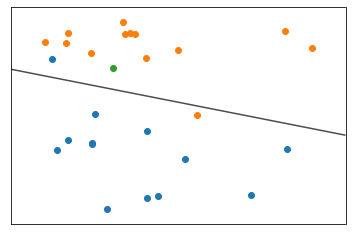

In [30]:
# Logistic Regression을 그림으로 알아보자! 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from sklearn.linear_model import LogisticRegression
import mglearn 

warnings.filterwarnings(action="ignore")  # warning 무시

x,y = mglearn.datasets.make_forge()  #가지고있는 데이터 뽑아다가 우리에게 넘겨줌
x  # 실수값 들어있는 2차원 배열
y  # 0,1

# 먼저 간단하게 scatter(산점도)를 그려보자! 
# y값이 0인 x를 추출해서 x의 첫번째 컬럼을 x축으로, 
# x의 두번째 컬럼을 y축으로 scatter 그려보자. 
blue = x[y==0]
orange = x[y==1]

plt.scatter(blue[:,0],blue[:,1])  # blue[:,0]: 모든 행, 1열
plt.scatter(orange[:,0],orange[:,1])

# machine learning(Logistic Regression)
# train data set  (test는 넘어가자)
train_x_data = x
train_y_data = y # y축 지금 1차원 배열
train_y_data = y.reshape([-1,1])  # 행은 상관없이 열은 1로 고정하자

# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# weight, bias
W = tf.Variable(tf.random_normal(shape=[2,1])) #자체적으로 값을 변경시킬 수 있는 함수 variable 이용  # 초기값은 랜덤으로 지정
b = tf.Variable(tf.random_normal(shape=[1])) 

# hypothesis
logit = tf.matmul(X,W)+b  
H = tf.sigmoid(logit)

# cost function(loss function)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,
                                                             labels=Y))

# train
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train = optimizer.minimize(cost)  -> 두번할필요없이 아래처럼 축약해서 사용하자
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 진행
for step in range(3000):
    _,cost_val = sess.run([train,cost], feed_dict={X:train_x_data,
                                                 Y:train_y_data})
    if step%300==0:
        print("cost값은:{}".format(cost_val))

# 정확도 측정(accuracy): 95% 이상 나오면 쓸만한 모델
# Prediction(예측)
result = sess.run(H, feed_dict={X:[[9,4]]})
plt.scatter(9,4)



## sklearn으로 해보자!
model = LogisticRegression()  # 기본 모델 만들기
myModel = model.fit(x,y)  # logistic model 학습시키기
print(myModel.predict([[9,4]])) 
mglearn.plots.plot_2d_separator(myModel,
                                x,
                                fill=False,
                                eps=0.5, # eps: 크기
                                alpha=0.7)  # alpha: 투명도
# 이 선의 아래에 있으면 0으로, 위에 있으면 1로 간주하겠다. 
# 로지스틱은 이 선을 만들어내는 과정.
# linear는 데이터를 잘 설명하는 선 그리는 과정(데이터를 대표하는). 
# logistic은 0과 1을 구분하는 선을 구하는 과정
# 3차원일 경우는? 선이 아니라 면이 될 것 

# 주황색 하나, 파랑 하나가 다르게 되어있으나
# 저걸 제대로 하려면 과적합의 문제가 발생한다. 

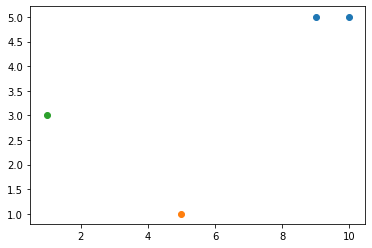

In [35]:
# Logistic Multinomial로 확장해보자!
# x 데이터는 시험 성적과 출석점수
# y 데이터는 학점
x = np.array([[10,5],[9,5],[5,1],[4,2],[1,3]])
y = np.array([["A"],["A"],["B"],["B"],["C"]])

plt.scatter(x[0:2,0],x[0:2,1])  # A등급 점찍어보자
plt.scatter(x[2:3,0],x[2:3,1]) # B등급 점찍어보자
plt.scatter(x[4,0],x[4,1])  # C등급 점찍어보자


In [41]:
import tensorflow as tf

# 0108 예제3
# train data set
# 퀴즈1, 퀴즈2, 퀴즈3, 출석
train_x_data = [[10,7,8,5],
               [8,8,9,4],
               [7,8,2,3],
               [6,3,9,3],
               [7,5,7,4],
               [3,5,6,2],
               [2,4,3,1]]

# 성적 - one hot encoding
train_y_data = [[1,0,0],  # A를 표현한 것
               [1,0,0],
               [0,1,0],
               [0,1,0],
               [0,1,0],
               [0,0,1],
               [0,0,1]]
# placeholder
X = tf.placeholder(shape=[None,4], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([4,3]),name="weight")
b = tf.Variable(tf.random_normal([3]),name="bias")  # 1차원으로 3개

# H
logit = tf.matmul(X,W)+b 
H = tf.nn.softmax(logit) # 우리는 각각의 확률이 아니라 전체의 확률 구해야 하므로 sigmoid 사용 X

# cost function - hypothesis가 변경되었으므로 cost함수도 변경될 수 밖에 없음
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,   # version2로 해야 정확
                                                                labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost],feed_dict={X : train_x_data,
                                                 Y : train_y_data})
    if step%300==0:
        print("cost값은:{}".format(cost_val))
        
# Accuracy(정확도)
sess.run(H,feed_dict={X:[[10,8,9,5]]})
# array([[9.9101710e-01, 8.9828558e-03, 2.5414952e-08]], dtype=float32)
# -> A될 확률 0.99, B될확률:.. -> 다 더하면 1
# 결과로 나온 값이 y label(0,1,0 등)과 같은가 비교하면 됨.

predict = tf.argmax(H,axis=1)  # argmax: 데이터가 있을 때 열방향(한 행에서의) 최대값이 몇번째에 있는지
# 가장 값이 큰 곳의 index번호를 return (0,1,2중 하나 return)
correct = tf.equal(predict, tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도:{}".format(sess.run(accuracy, feed_dict={X:train_x_data,
                                                   Y:train_y_data})))


cost값은:18.458879470825195
cost값은:1.0329055786132812
cost값은:0.6862775683403015
cost값은:0.5587778091430664
cost값은:0.5118946433067322
cost값은:0.46800968050956726
cost값은:0.0542457178235054
cost값은:0.049010004848241806
cost값은:0.04514489695429802
cost값은:0.042027201503515244
정확도:1.0


# 실습문제 

## BMI 데이터를 학습한 후 자신의 키와 몸무게를 넣어서 자신의 상태를 확인해보자.

- bmi.csv 파일을 이용하여 multinomial 문제를 학습해보자!

- label 0: thin
- label 1: normal
- label 2: fat

In [89]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # 이상치 확인하기 위한 함수
import warnings  # 경고 안보이게
from sklearn.preprocessing import MinMaxScaler

# 경고메시지 출력 X
warnings.filterwarnings(action="ignore")

# 데이터 불러오기
bmi_df = pd.read_csv("./data/bmi.csv", skiprows=3) # 앞의 3줄은 빼고 가져오겠다

# # 결측치 확인
# bmi_df.isnull().sum()  # 결측치 없음 
# # 이상치 확인
# plt.boxplot(bmi_df["height"]) # 이상치 없음 
# plt.boxplot(bmi_df["weight"]) # 이상치 없음 


##################################################################################################

# train data와 test data 생성 - 80:20
train_num = int(bmi_df.shape[0]*0.8) 

train_x_data = bmi_df[["height","weight"]][:train_num].values
train_x_data = MinMaxScaler().fit_transform(train_x_data)
test_x_data = bmi_df[["height","weight"]][train_num:].values 
test_x_data = MinMaxScaler().fit_transform(test_x_data)

train_y_data = bmi_df["label"][:train_num].values.reshape(-1,1)
test_y_data = bmi_df["label"][train_num:].values.reshape(-1,1)

# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.int32)

class_num = 3
Y_one_hot = tf.one_hot(Y,class_num)
Y_one_hot = tf.reshape(Y_one_hot, [-1,class_num])

# W, b
W = tf.Variable(tf.random_normal([2,3]),name="weight")
b = tf.Variable(tf.random_normal([3]),name="bias")  # 1차원으로 3개

# H
logit = tf.matmul(X,W)+b 
H = tf.nn.softmax(logit) 

# cost function
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,   # version2로 해야 정확
                                                    labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)


# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(10000):
    _, cost_val = sess.run([train,cost],feed_dict={X : train_x_data,
                                                 Y : train_y_data})
    if step%1000==0:
        print("cost값은:{}".format(cost_val))
        
        
predict = tf.argmax(H,axis=1)  # argmax: 데이터가 있을 때 열방향(한 행에서의) 최대값이 몇번째에 있는지
# 가장 값이 큰 곳의 index번호를 return (0,1,2중 하나 return)

correct = tf.equal(predict, tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도:{}".format(sess.run(accuracy, feed_dict={X:test_x_data,
                                                   Y:test_y_data})))
       


cost값은:1.2413320541381836
cost값은:0.5131834745407104
cost값은:0.4122363328933716
cost값은:0.3603246808052063
cost값은:0.32659435272216797
cost값은:0.30220213532447815
cost값은:0.2834118604660034
cost값은:0.26831701397895813
cost값은:0.2558182179927826
cost값은:0.24523313343524933
정확도:0.3165000081062317


# 연습문제 선생님 답

In [114]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # 이상치 확인하기 위한 함수
import warnings  # 경고 안보이게
from sklearn.preprocessing import MinMaxScaler

# 경고메시지 출력 X
warnings.filterwarnings(action="ignore")

# 데이터 불러오기
bmi_df = pd.read_csv("./data/bmi.csv", skiprows=3) # 앞의 3줄은 빼고 가져오겠다

# # 결측치 확인
# bmi_df.isnull().sum()  # 결측치 없음 
# # 이상치 확인
# plt.boxplot(bmi_df["height"]) # 이상치 없음 
# plt.boxplot(bmi_df["weight"]) # 이상치 없음 


##################################################################################################

# train data와 test data 생성 
# 정규화 작업
scaler= MinMaxScaler()
train_num = int(bmi_df.shape[0]*0.8) 
# scaler.data_max_  # 가지고있는 데이터의 최대값
# scaler.data_min_  # 최대, 최소값 가지고 scaling
x_data = scaler.fit_transform(bmi_df[["height","weight"]])

# 데이터 분할해 x data 생성 - 80:20
train_x_data = x_data[:train_num]  # nparray에서 자른 값 ->  뒤의 값이 exclusive 해서 16000개
test_x_data = x_data[train_num:]

# 학습용, 테스트용 y data 생성 -> one hot encoding
# one hot encoding으로 전환하는 방법 2가지
# 1. pandas.get_dummies()
# 2. tensorflow.one_hot()
sess = tf.Session()
train_y_data = sess.run(tf.one_hot(bmi_df.loc[:train_num-1,"label"], 3)) # 원래 1차원 자료가 one-hot encoding 적용하면 2차원 자료가 된다.
# sess.run(tf.one_hot(bmi_df.loc[:train_num-1,"label"], 3)).shape # data frame이라 loc 사용하면 뒤부분 inclusive하다 -> train_num -1 빼줘야 함! 
test_y_data = sess.run(tf.one_hot(bmi_df.loc[train_num:,"label"], 3))

#################################################################################################

# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,3],dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([2,3]),name="weight")
b = tf.Variable(tf.random_normal([3]),name="bias")  # 1차원으로 3개

# H
logit = tf.matmul(X,W)+b 
H = tf.nn.softmax(logit) 

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,   # version2로 해야 정확
                                                                labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session
sess.run(tf.global_variables_initializer())

# 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost],feed_dict={X : train_x_data,
                                                   Y : train_y_data})
    if step%3000==0:
        print("cost값은:{}".format(cost_val))
      
    


cost값은:1.3155639171600342
cost값은:0.3604184091091156
cost값은:0.2834528982639313
cost값은:0.24525804817676544
cost값은:0.2210853099822998
cost값은:0.20393280684947968
cost값은:0.1909092664718628
cost값은:0.18056564033031464
cost값은:0.17208126187324524
cost값은:0.16495119035243988


In [108]:
# Accuracy(정확도) 측정
predict = tf.argmax(H,axis=1)  
correct = tf.equal(predict, tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도:{}".format(sess.run(accuracy, feed_dict={X:test_x_data,
                                                   Y:test_y_data})))

    

정확도:0.9797499775886536


In [121]:
# Prediction
# prediction_data = [[187,78]]
# 예측하기 위해서 다시 scaling한 값 넣어줘야 한다.

# MinMax scaler가 min, max값 가지고 있다.
prediction_data = scaler.transform([[165,80]])

#sess.run(H,feed_dict={X:prediction_data})
result = sess.run(tf.argmax(H,1), feed_dict={X:prediction_data})[0]

if result ==0:
    print("Thin")
elif result ==1:
    print("Normal")
else:
    print("Fat")

Fat
